In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import warnings

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
_h = 60
_d = 60*24
_w = 60*24*7

### Load dataset

In [3]:
series = pd.read_csv('dataset/people.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series.index = series.index.floor('Min')

In [4]:
gdata = series.groupby(series.index.hour)[['zone1', 'zone2', 'zone3', 'zone4']].mean()
gdata

,zone1,zone2,zone3,zone4
datetime,,,,
0,1.348214,1.357143,0.089286,2.794643
1,2.120000,2.506667,0.026667,2.026667
2,1.964286,0.297619,0.000000,1.761905
3,1.903614,0.096386,0.024096,1.879518
4,1.925926,0.185185,0.037037,1.777778
5,1.094340,1.490566,0.000000,1.660377
6,1.729167,0.000000,0.041667,1.020833
7,2.280303,0.272727,0.030303,2.371212
8,5.195652,0.934783,0.101449,2.333333


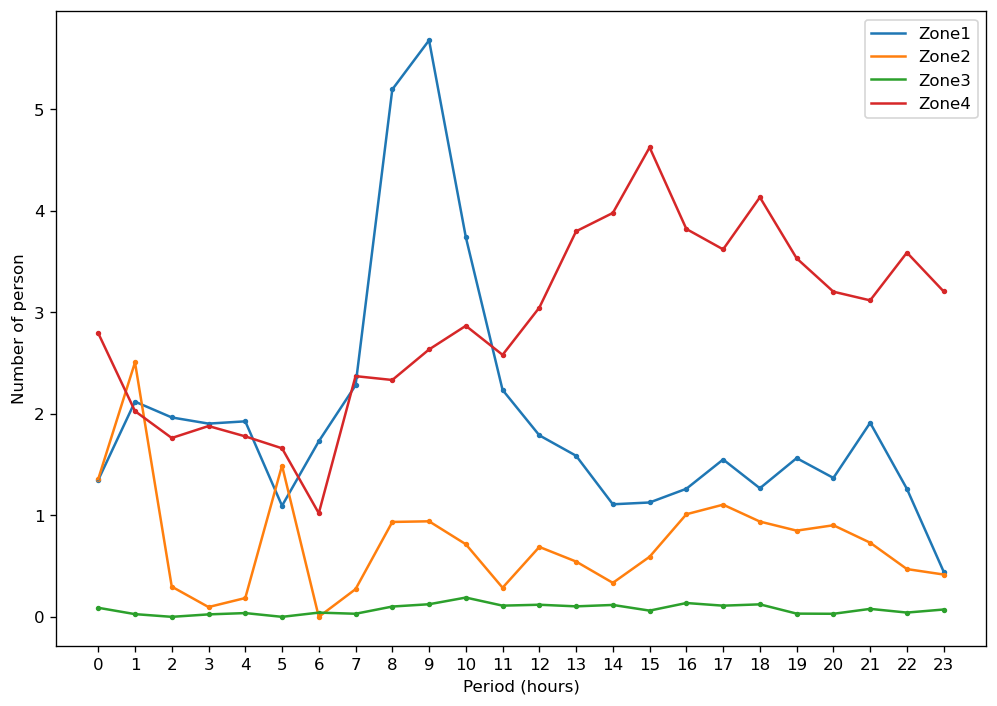

In [8]:
plt.plot(gdata['zone1'], label = 'Zone1')
plt.plot(gdata['zone2'], label = 'Zone2')
plt.plot(gdata['zone3'], label = 'Zone3')
plt.plot(gdata['zone4'], label = 'Zone4')
plt.scatter(gdata.index,gdata['zone1'], s = 5)
plt.scatter(gdata.index,gdata['zone2'], s = 5)
plt.scatter(gdata.index,gdata['zone3'], s = 5)
plt.scatter(gdata.index,gdata['zone4'], s = 5)
plt.xlabel('Period (hours)')
plt.ylabel('Number of person')
plt.xticks(gdata.index)
plt.legend(loc= 'best')
plt.show()